In [1]:
import numpy as np
import pandas as pd

import soundscapy as sspy
from soundscapy.spi import MultiSkewNorm
from soundscapy.surveys.survey_utils import LANGUAGE_ANGLES, PAQ_IDS

data = sspy.isd.load()
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data = data.drop(excl_id)

In [2]:
for lang in data.Language.unique():
    angles = LANGUAGE_ANGLES[lang]

    lang_idx = data.query(f"Language == '{lang}'").index
    iso_pl, iso_ev = sspy.surveys.processing.calculate_iso_coords(
        data.loc[lang_idx, PAQ_IDS], (1, 5), angles
    )
    data.loc[lang_idx, "ISOPleasant"] = round(iso_pl, 3)
    data.loc[lang_idx, "ISOEventful"] = round(iso_ev, 3)

data.head()

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.0,-10.29,0.209,-0.144
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.0,-10.29,-0.443,0.468
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.637,0.002
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.589,-0.092
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.3,-17.33,0.445,-0.126


Fitted from data. n = 96
Direct Parameters:
xi:    [-0.106  0.559]
omega: [[ 0.149 -0.062]
 [-0.062  0.103]]
alpha: [ 0.697 -0.787]


Centred Parameters:
mean:  [0.1   0.381]
sigma: [[ 0.107 -0.025]
 [-0.025  0.071]]
skew:  [ 0.107 -0.128]


<Axes: title={'center': 'Soundscape Density Plot'}, xlabel='$P_{ISO}$', ylabel='$E_{ISO}$'>

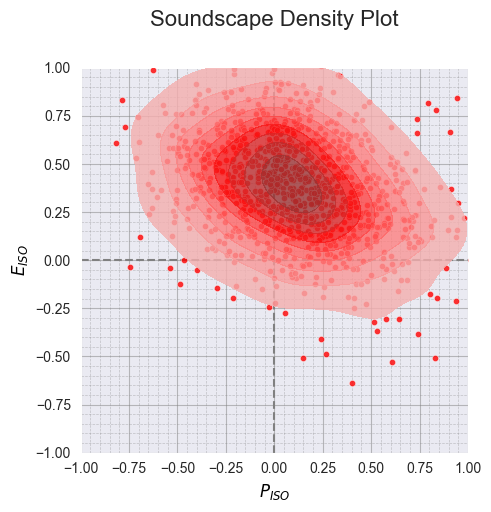

In [3]:
ct = data.query("LocationID == 'SanMarco'")
x = ct["ISOPleasant"].values
y = ct["ISOEventful"].values

msn = MultiSkewNorm()
msn.fit(data=ct[["ISOPleasant", "ISOEventful"]])
msn.summary()
tgt_df = pd.DataFrame(
    msn.sample(n=1000, return_sample=True), columns=["ISOPleasant", "ISOEventful"]
)
sspy.density(tgt_df, color="red")

Fitted from direct parameters.
Direct Parameters:
xi:    [0.065 0.629]
omega: [[ 0.149 -0.064]
 [-0.064  0.101]]
alpha: [ 0.791 -0.767]


Centred Parameters:
mean:  [0.283 0.451]
sigma: [[ 0.102 -0.026]
 [-0.026  0.07 ]]
skew:  [ 0.136 -0.131]


<Axes: title={'center': 'Soundscape Density Plot'}, xlabel='$P_{ISO}$', ylabel='$E_{ISO}$'>

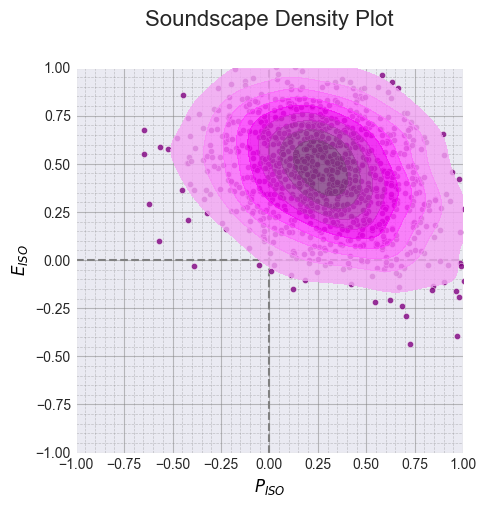

In [5]:
msn2 = MultiSkewNorm()
msn2.define_dp(
    xi=np.array([0.06534, 0.628637]),
    omega=np.array([[0.14890315, -0.06423752], [-0.06423752, 0.10139612]]),
    alpha=np.array([0.79105, -0.767217]),
)
msn2.sample(n=1000, return_sample=True)
msn2.summary()
tgt2_df = pd.DataFrame(
    msn2.sample(n=1000, return_sample=True), columns=["ISOPleasant", "ISOEventful"]
)
sspy.density(tgt2_df, color="purple")